<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/HW0_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 0: Radioactive Decay

Kristen Larson

March 29, 2023

## WHY [Are We Here?]

Radioactive decay is a statistical process in which the number of particles that decay per unit time is proportional to the number of particles that exist at that time.  In other words, the time rate of change of the number of particles, $N$, is negative and proportional to $N$.  We write the constant of proportionality as

$$ \frac{dN}{dt}= -\frac{1}{\tau}N$$

where $\tau$ is called the <i>time constant</i>.  In the problem, we will calculate the average lifetime of a particle and compare it to $\tau$.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## WHAT [Calculations Do You Do?]

I use the Euler method to solve the differential equation for N.  After initializing the number of particles and the time constant, I create a loop.  For each time step $\Delta t$, I update $t$ and $N$:

> t = t + dt  
> N = N - (N/tau)*dt

Then, to calculate the average lifetime, I do a weighted sum of the number of particles lost in each step multiplied by the time those particles decayed.

In [ ]:
# First initialize values
tau = 1.
dt = tau/100
steps = 1000
t = np.zeros(steps)
N = np.zeros(steps)
N[0] = 1000.0

In [ ]:
for i in range(steps-1):
    t[i+1] = t[i] + dt
    N[i+1] = N[i] - dt*N[i]/tau

In [ ]:
np.sum(t*N/tau)/np.sum(N/tau)

0.9895682688875203

## HOW [Do You Know the Computer Is Doing What You Think It Is Doing?]

This problem has a well-known analytic solution,

$$
N = N_0 e^{-t/\tau}
$$

Here we show that our calculations are equivalent to the calculations for the parameters we chose, so we can have confidence in our code.

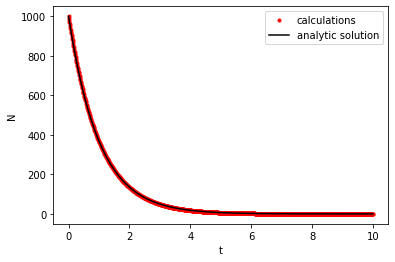

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, N, 'r.', label='calculations')
ax.plot(t, N[0]*np.exp(-t/tau), 'k', label='analytic solution')
ax.legend(loc='best')
ax.set_ylabel('N')
ax.set_xlabel('t')
plt.show()

## SO WHAT?

| Time constant | Mean Lifetime |
| -----------   | -----------   |
| 1.0           | 0.990         |
| 2.0           | 1.979         |
| 3.0           | 2.969         |

We tried several values of $\tau$ and found that the average lifetime is simply equal to the time constant within the computational accuracy of the Euler method.